In [1]:
import pandas as pd
from math import cos, sin, acos, asin, radians

In [2]:
df = pd.read_csv("..\\datasets\\nyc_taxi_trip_duration.csv", engine='pyarrow')

In [3]:
df['passenger_count'].value_counts()

passenger_count
1    517415
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
7         1
9         1
Name: count, dtype: int64

## В датасете есть 33 поездки без пассажиров, одна с семью, и одна с девятью пассажирами

In [4]:
df['trip_duration'].quantile(0.999) / 3600 / 24

0.9833376157407825

0.1% поездок длились почти сутки или более

In [5]:
df.loc[df['trip_duration'] > 3600 * 10]['trip_duration'].count()

978

## почти 1000 поездок длились более десяти часов

<Axes: xlabel='Дата', ylabel='Длительность поездки'>

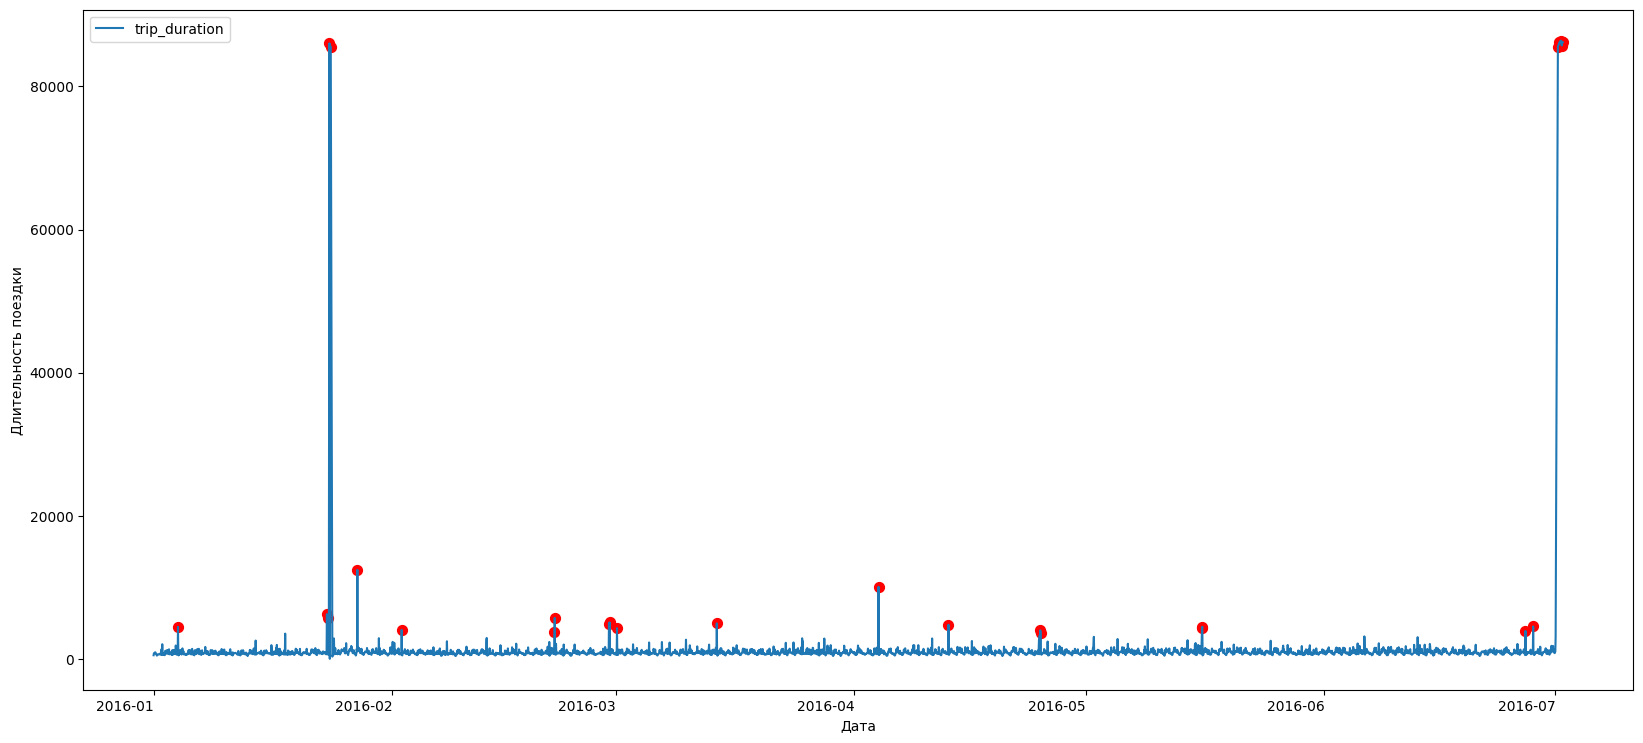

In [6]:
df_dates = df[["dropoff_datetime", "trip_duration"]].copy()
df_dates["dropoff_datetime"] = df_dates["dropoff_datetime"].dt.round('H')
df_dates = df_dates.groupby(by="dropoff_datetime").mean().reset_index()
ax = df_dates.plot(x="dropoff_datetime", y="trip_duration", figsize=(20, 10))
df_dates.loc[df_dates['trip_duration'] > 3600].plot.scatter(x="dropoff_datetime", y="trip_duration", ax=ax, c='r', s=50, xlabel='Дата', ylabel='Длительность поездки')


In [7]:
df['trip_duration'].quantile(0.005)

50.0

In [8]:
df.loc[df['trip_duration'] < 10]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
136,id1514658,1,2016-03-22 08:23:09,2016-03-22 08:23:16,2,-73.902054,40.764011,-73.902061,40.764023,N,7
448,id1326538,2,2016-03-18 12:19:33,2016-03-18 12:19:42,1,-73.974197,40.762718,-73.975693,40.760723,N,9
3169,id1620472,1,2016-02-18 03:22:38,2016-02-18 03:22:40,1,-73.957687,40.718021,-73.957687,40.718025,N,2
3417,id3499474,2,2016-06-25 20:22:29,2016-06-25 20:22:37,5,-73.936859,40.764721,-73.936821,40.764751,N,8
4079,id3224766,2,2016-05-14 00:04:08,2016-05-14 00:04:15,6,-73.958549,40.800159,-73.959923,40.798420,N,7
...,...,...,...,...,...,...,...,...,...,...,...
723266,id0701838,1,2016-02-11 21:35:27,2016-02-11 21:35:30,1,-73.956413,40.775345,-73.956421,40.775333,N,3
723470,id0741320,1,2016-03-16 12:13:08,2016-03-16 12:13:17,1,-73.942169,40.751625,-73.942169,40.751625,N,9
725293,id3396117,2,2016-03-23 22:17:59,2016-03-23 22:18:05,1,-74.007912,40.744621,-74.007912,40.744621,N,6
726045,id1327840,1,2016-01-26 18:08:43,2016-01-26 18:08:52,1,-73.932747,40.751091,-73.932739,40.751095,N,9


0.5% поездок длились не более 50 секунд
почти 1000 поездок длились менее 10 секунд

In [9]:
lat1 = df['pickup_latitude'].apply(radians)
lat2 = df['dropoff_latitude'].apply(radians)
long1 = df['pickup_longitude'].apply(radians)
long2 = df['dropoff_longitude'].apply(radians)
df['distance'] = 2 * 6371 * ((((lat2-lat1)/2).apply(sin) ** 2 + (lat1).apply(cos) * (lat2).apply(cos) * ((long2-long1)/2).apply(sin) ** 2) ** 0.5 ).apply(asin)

In [10]:
df[df['distance'] > 200]['distance']

244913    1240.908677
441429     545.853499
621372     574.875442
654569     320.125775
695286     254.363523
697620     314.764203
Name: distance, dtype: float64

## 6 поездок на расстояние более 200 км, одна из них на 1240 км